# Proyecto 3

**Tema:** Resultados Saber 11

|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |

## Modelo - Aprendizaje de Estructura - Puntajes - BIC

## Librerías Requeridas

In [2]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.readwrite import BIFWriter

## Carga de Datos

In [3]:
df = pd.read_csv("../../Data/Transformed/Discrete.csv")

In [4]:
df.head()

,colegio_rural,colegio_bilingue,colegio_calendario,colegio_privado,colegio_genero,colegio_jornada,estudiante_genero,familia_estrato,madre_educacion,padre_educacion,computador,internet,puntaje,colegio_mcpio_distinto,presentacion_mcpio_distinto
0,0,0,1,0,1,2,0,1,4,2,1,1,5,0,0
1,0,0,1,0,1,2,0,1,3,3,0,0,4,0,1
2,0,0,1,0,1,2,0,1,3,3,0,0,4,0,1
3,1,0,1,1,2,5,0,4,9,10,1,1,7,0,0
4,0,0,1,0,1,2,0,1,2,2,1,1,5,0,0


## BIC Score

### Estimación Estructura

In [5]:
scoring_method = BicScore(data=df)
esth = HillClimbSearch(data=df)

estimated_model_bic = esth.estimate(
    scoring_method=scoring_method,
    max_indegree=4,
    max_iter=int(1e4)
)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [6]:
print(estimated_model_bic)
print(estimated_model_bic.nodes())
print(estimated_model_bic.edges())

DAG with 15 nodes and 50 edges
['colegio_rural', 'colegio_bilingue', 'colegio_calendario', 'colegio_privado', 'colegio_genero', 'colegio_jornada', 'estudiante_genero', 'familia_estrato', 'madre_educacion', 'padre_educacion', 'computador', 'internet', 'puntaje', 'colegio_mcpio_distinto', 'presentacion_mcpio_distinto']
[('colegio_rural', 'presentacion_mcpio_distinto'), ('colegio_rural', 'colegio_privado'), ('colegio_rural', 'colegio_mcpio_distinto'), ('colegio_rural', 'colegio_calendario'), ('colegio_rural', 'colegio_genero'), ('colegio_calendario', 'colegio_bilingue'), ('colegio_privado', 'colegio_jornada'), ('colegio_privado', 'colegio_calendario'), ('colegio_privado', 'presentacion_mcpio_distinto'), ('colegio_privado', 'colegio_mcpio_distinto'), ('colegio_privado', 'estudiante_genero'), ('colegio_genero', 'estudiante_genero'), ('colegio_genero', 'colegio_bilingue'), ('colegio_jornada', 'colegio_genero'), ('colegio_jornada', 'colegio_calendario'), ('colegio_jornada', 'colegio_bilingue'

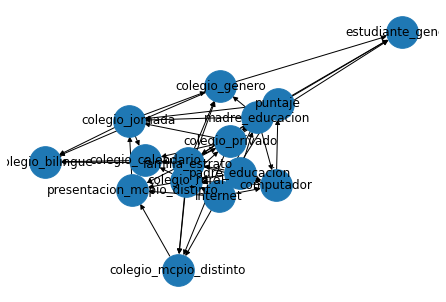

In [7]:
nodes = list(estimated_model_bic.nodes())
edges = list(estimated_model_bic.edges())

# Create Graph
G = nx.DiGraph()

# Add Nodes
for node in nodes:
    G.add_node(node)
    
# Add Edges
for edge in edges:
    G.add_edge(edge[0], edge[1])
    
# Draw Graph
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_size=1000, arrows=True)
plt.show()

In [8]:
print(scoring_method.score(estimated_model_bic))

-35374985.84768045


### Red Bayesiana

In [14]:
model = BayesianNetwork(estimated_model_bic)
model.fit(data=df, estimator=MaximumLikelihoodEstimator)

In [15]:
for i in model.nodes():
    print(model.get_cpds(i))

+------------------+-----+---------------------+
| computador       | ... | computador(1)       |
+------------------+-----+---------------------+
| familia_estrato  | ... | familia_estrato(6)  |
+------------------+-----+---------------------+
| internet         | ... | internet(1)         |
+------------------+-----+---------------------+
| padre_educacion  | ... | padre_educacion(10) |
+------------------+-----+---------------------+
| colegio_rural(0) | ... | 0.7942420152946469  |
+------------------+-----+---------------------+
| colegio_rural(1) | ... | 0.20575798470535311 |
+------------------+-----+---------------------+
+---------------------+-----+-----------------------+
| colegio_calendario  | ... | colegio_calendario(3) |
+---------------------+-----+-----------------------+
| colegio_genero      | ... | colegio_genero(3)     |
+---------------------+-----+-----------------------+
| colegio_jornada     | ... | colegio_jornada(6)    |
+---------------------+-----+----------

### Guardar Modelo

In [16]:
writer = BIFWriter(model)
writer.write_bif('../Models/Estructura_Puntaje_BIC.bif')